<a href="https://colab.research.google.com/github/bumbum2403/Learning_GIT/blob/main/Shubham_Dwivedi_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


THIS APPROACH WAS NOT VERY GOOD, LET'S TRY DBSCAN

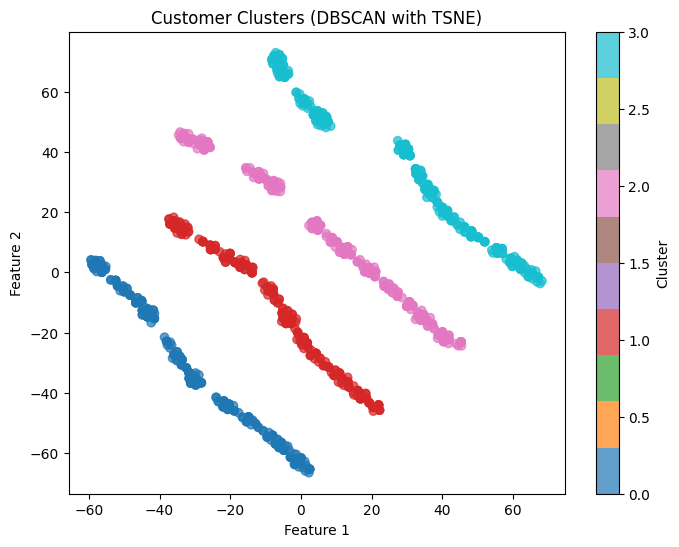

DBSCAN identified 4 clusters.


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt


# Load the customer and transaction data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Preprocess data - Merge the customer and transaction data
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')


# Merging the Customers and Transactions data on 'CustomerID'
merged_data = pd.merge(transactions_df, customers_df, on='CustomerID')

# Select relevant features for clustering (transaction and profile data)
features = merged_data[['TotalValue', 'Quantity', 'Price']]  # You can add more features as needed

# Scaling the features to bring them to the same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# 5. DBSCAN Clustering (Density-based)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# 6. Visualize DBSCAN Clusters with TSNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=dbscan_labels, cmap='tab10', alpha=0.7)
plt.title("Customer Clusters (DBSCAN with TSNE)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# 7. Count DBSCAN Clusters (ignoring noise)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN identified {unique_clusters} clusters.")





In [25]:
from sklearn.metrics import davies_bouldin_score

# Ensure the DBSCAN labels are valid (excluding noise for DB Index calculation)
valid_labels = dbscan_labels[dbscan_labels != -1]
valid_features = scaled_features[dbscan_labels != -1]

if len(set(valid_labels)) > 1:  # DB Index requires at least two clusters
    db_index = davies_bouldin_score(valid_features, valid_labels)
    print(f"Davies-Bouldin Index (DBSCAN): {db_index}")
else:
    print("DBSCAN resulted in less than two clusters, DB Index cannot be calculated.")


Davies-Bouldin Index (DBSCAN): 2.1803421071191345


In [28]:
merged_data['DBSCAN_Cluster'] = dbscan_labels
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,DBSCAN_Cluster
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,0
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,0
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,0
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,1
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2


In [29]:
# Group by cluster and calculate mean values for each feature
cluster_summary = merged_data.groupby('DBSCAN_Cluster')[['TotalValue', 'Quantity', 'Price']].mean()

print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
                 TotalValue  Quantity       Price
DBSCAN_Cluster                                   
0                273.983389       1.0  273.983389
1                545.787561       2.0  272.893780
2                820.994764       3.0  273.664921
3               1079.375939       4.0  269.843985


All clusters share a similar price range for items (around 270), but they differ in terms of the quantity purchased.
The clusters represent different customer purchasing behaviors:


*   Cluster 0: Single-item, low-value buyers.

*   Cluster 1: Moderate buyers (2 items).


*   Cluster 2: High-volume buyers (3 items).

*   Cluster 3: Bulk buyers (4 items).





# BOXPLOT
Let's verify using a boxplot for more insights..


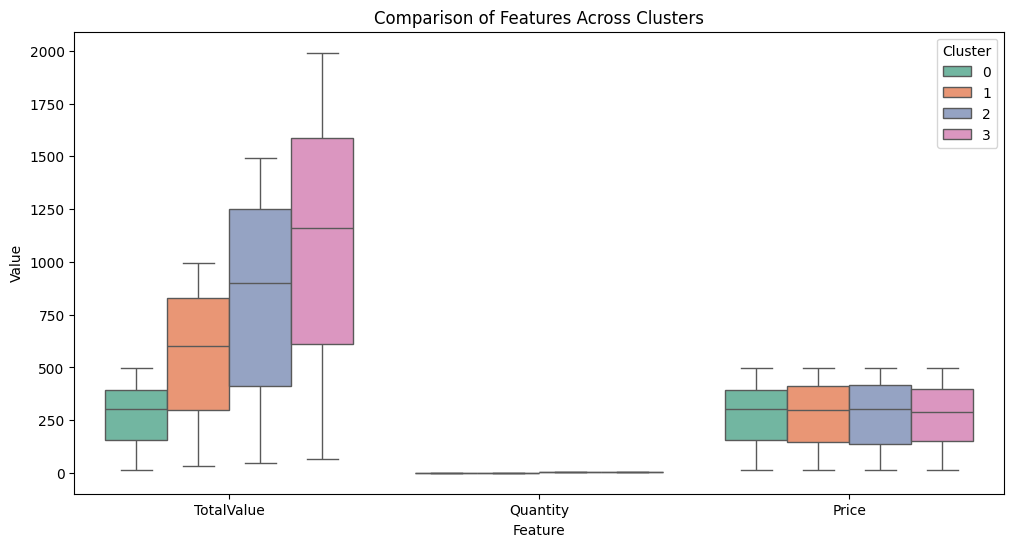

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# let's combine cluster labels with the original data
merged_data['DBSCAN_Cluster'] = dbscan_labels


summary_df = merged_data.groupby('DBSCAN_Cluster')[['TotalValue', 'Quantity', 'Price']].mean().reset_index()

# Melt the data for easy box plot creation
melted_df = merged_data.melt(id_vars=['DBSCAN_Cluster'], value_vars=['TotalValue', 'Quantity', 'Price'],
                             var_name='Feature', value_name='Value')

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', hue='DBSCAN_Cluster', data=melted_df, palette='Set2')
plt.title('Comparison of Features Across Clusters')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.legend(title='Cluster', loc='upper right')
plt.show()


TotalValue: Cluter 3 yields the highest transaction amounts
 So, we can focus promotions on clusters with higher total values.


Price: There isn't much difference across this parameter, if there was we could've designed a few more price-sensitive deals for the customers in those segment